In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

In [73]:
df_landmarks = pd.read_parquet('landmarks.parquet')
df_target = pd.read_parquet('ground_truth.parquet')

In [74]:
df_landmarks.head()

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433
../face_sad\10006.jpg,-0.152156,0.496509,0.232238,0.000000,0.088090,0.024025,-0.088090,0.176181,0.232238,-0.176181,...,0.744763,0.056057,-0.480492,0.744763,-0.008008,-0.416427,0.744763,0.064066,-0.352361,0.744763
../face_sad\10020.jpg,-0.020125,0.167710,0.362253,0.000000,0.053667,0.053667,0.000000,0.053667,0.275044,-0.053667,...,0.201252,0.483004,-0.670839,0.201252,0.402503,-0.610463,0.201252,0.456170,-0.556796,0.201252
../face_sad\1003.jpg,0.044274,0.221368,0.435356,0.000000,0.066410,0.066410,0.029516,0.081168,0.339430,-0.066410,...,0.287778,0.553419,-0.641966,0.287778,0.464872,-0.575556,0.287778,0.546040,-0.509145,0.287778
../face_sad\10034.jpg,-0.107489,0.245689,0.291756,-0.023033,0.061422,0.038389,-0.069100,0.084456,0.222656,-0.038389,...,0.268722,0.483700,-0.568156,0.268722,0.437634,-0.506734,0.268722,0.499056,-0.445311,0.268722
../face_sad\10049.jpg,0.025037,0.392253,0.166916,0.033383,0.083458,0.016692,0.000000,0.208645,0.183608,-0.191953,...,0.650973,0.000000,-0.467365,0.650973,-0.050075,-0.408944,0.650973,0.025037,-0.350524,0.650973


In [75]:
df_target.head()

,eye_Y,eye_X
../face_sad\10006.jpg,0.071311,0.034568
../face_sad\10008.jpg,-0.582527,0.306638
../face_sad\10020.jpg,-0.168844,0.048008
../face_sad\10028.jpg,0.013134,-0.557900
../face_sad\1003.jpg,-0.512572,0.154055


In [76]:
df = pd.merge(df_landmarks, df_target, left_index=True, right_index=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,1433,eye_Y,eye_X
../face_sad\10006.jpg,-0.152156,0.496509,0.232238,0.000000,0.088090,0.024025,-0.088090,0.176181,0.232238,-0.176181,...,-0.480492,0.744763,-0.008008,-0.416427,0.744763,0.064066,-0.352361,0.744763,0.071311,0.034568
../face_sad\10020.jpg,-0.020125,0.167710,0.362253,0.000000,0.053667,0.053667,0.000000,0.053667,0.275044,-0.053667,...,-0.670839,0.201252,0.402503,-0.610463,0.201252,0.456170,-0.556796,0.201252,-0.168844,0.048008
../face_sad\1003.jpg,0.044274,0.221368,0.435356,0.000000,0.066410,0.066410,0.029516,0.081168,0.339430,-0.066410,...,-0.641966,0.287778,0.464872,-0.575556,0.287778,0.546040,-0.509145,0.287778,-0.512572,0.154055
../face_sad\10049.jpg,0.025037,0.392253,0.166916,0.033383,0.083458,0.016692,0.000000,0.208645,0.183608,-0.191953,...,-0.467365,0.650973,-0.050075,-0.408944,0.650973,0.025037,-0.350524,0.650973,0.434686,0.347831
../face_sad\10059.jpg,-0.131630,0.473867,0.122854,0.017551,0.087753,0.008775,-0.078978,0.219383,0.149180,-0.184281,...,-0.429990,0.710800,-0.140405,-0.359788,0.710800,-0.052652,-0.307136,0.710800,-0.099977,-0.679639


In [77]:
X = df.drop(['eye_X', 'eye_Y'], axis=1)

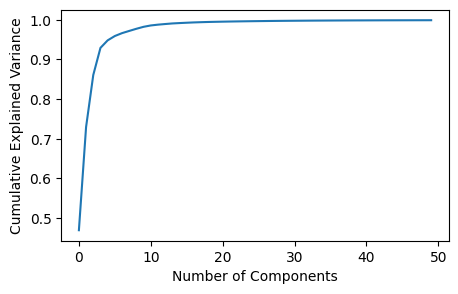

Top Cumulative Explained Variance:  0.9991369882549337


In [78]:
n_components = 50
pca = decomposition.PCA(n_components=n_components)
pca.fit(X.values)

plt.figure(figsize=(5, 3))
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_sum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print("Top Cumulative Explained Variance: ", cumulative_sum[n_components-1])

In [79]:
principal_components = pca.transform(X)

In [80]:
pc_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(n_components)])
pc_df.set_index(df.index, inplace=True)
pc_df['eye_X'] = df['eye_X']
pc_df['eye_Y'] = df['eye_Y']
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,eye_X,eye_Y
../face_sad\10006.jpg,8.170620,1.758124,-1.686603,0.443590,-0.730802,-0.479467,0.201219,0.602364,0.308764,0.314926,...,0.014364,-0.025409,-0.011937,0.045020,-0.026889,-0.054353,0.015540,0.045267,0.034568,0.071311
../face_sad\10020.jpg,-0.382137,-7.268163,0.981001,-0.624928,0.652251,-0.072976,0.577777,-0.125062,0.393385,-0.495389,...,0.009595,-0.054873,0.047633,-0.009451,0.017430,-0.112320,-0.019916,-0.015823,0.048008,-0.168844
../face_sad\1003.jpg,-1.749786,-5.932178,0.761919,2.786816,0.067978,0.456708,0.870204,0.134760,-0.240475,-0.527009,...,-0.068078,-0.008325,-0.039165,-0.015538,-0.007766,-0.043184,0.017635,-0.014809,0.154055,-0.512572
../face_sad\10049.jpg,5.236185,2.750396,-4.975794,-1.308158,0.028664,0.735824,0.552763,1.109475,-1.060542,-0.696715,...,0.025922,-0.009086,-0.019931,-0.043698,0.072085,-0.052391,0.048924,-0.020447,0.347831,0.434686
../face_sad\10059.jpg,8.527372,3.372973,-3.400573,-3.059543,-0.532782,0.500566,0.460939,0.606797,-0.599869,-0.241035,...,0.064572,-0.019564,-0.082745,0.021585,-0.024641,-0.035540,0.058960,-0.013307,-0.679639,-0.099977


In [81]:
pc_df.to_parquet("components_with_regression_targets.parquet", index=False)